# Theoretical Calculation of Rekative Fluorescence Intensity for Cs

### Definition of constants (cf.paper)

In [13]:
from math import *
from scipy.integrate import *
import numpy as np
import matplotlib.pyplot as plt


# Settings
I = 183 * 0.001 * 1/(10**-2)**2

# Physical Constants
pi = 3.1415926535
h = 6.62607004 * 10**(-34)
c = 299792458

delta = 10* 10**6 #Laser Detuning (Pump - Resonance)

g23 = 4.05*10**6
g34 = 6.23*10**6
g35 = 11.4*10**6
g41 = 28.6*10**6
g26 = 0.13*10**6
g27 = 1.10*10**6
g75 = 0.78*10**6
g65 = 0.11*10**6
g51 = 32.8*10**6
g64 = 0.91*10**6
g21 = 1.84*10**6

l21 = 455.5 * 10**-9 
l23 = 2931.8 * 10**-9 
l35 = 1469.9  * 10**-9 
l41 = 894.3  * 10**-9 
l64 = 3011.1  * 10**-9 
l51 = 852.1 * 10**-9
l65 = 3614.1  * 10**-9 
l75 = 3491  * 10**-9 
l27 = 1360.6  * 10**-9 
l26 = 1342.8  * 10**-9 
l34 = 1359.2 * 10**-9 

Om = sqrt((3 * l21**3 * g21 * I )/(2*pi*h*c))

print(Om)

27656636.32697019


### Calculating the steady state of the density matrix

No handles with labels found to put in legend.


[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.85846065e-04  9.99286343e-01  4.04498942e-04 ...  1.09956441e-04
  -1.38214536e-03  6.90958187e-07]
 [ 3.75383454e-04  9.98569375e-01  8.07995926e-04 ...  2.19825631e-04
  -2.76291375e-03  2.76327412e-06]
 ...
 [ 5.07832505e-01  1.67312776e-01  3.84360090e-02 ...  2.36857073e-01
   4.30743279e-02 -4.66908442e-01]
 [ 5.07832589e-01  1.67312778e-01  3.84360080e-02 ...  2.36857002e-01
   4.30743381e-02 -4.66908561e-01]
 [ 5.07832673e-01  1.67312780e-01  3.84360070e-02 ...  2.36856932e-01
   4.30743483e-02 -4.66908680e-01]]


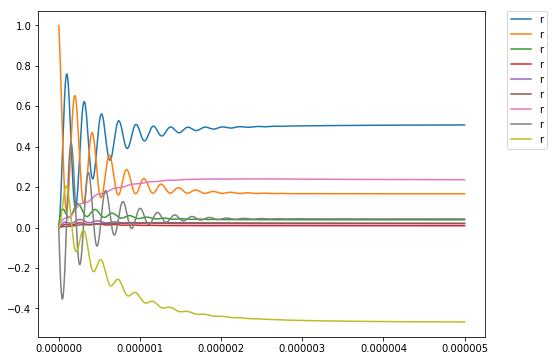

In [14]:
#ODE
t = np.arange(0, 5*10**-6, 10**-10)
r0=(0,1,0,0,0,0,0,0,0)
def rhs(r, t): 
    return [g21*r[1] + g41 * r[3] + g51*r[4]-Om*r[7], -(g21+g23+g26+g27)*r[1]+Om*r[7], g23*r[1]-(g34+g35)*r[2], g34*r[2]+g64*r[5]-g41*r[3],g35*r[2]+g65*r[5]+g75*r[6]-g51*r[4], g26*r[1]-(g64+g65)*r[5],g27*r[1]-g75*r[6],0.5*Om*(r[0]-r[1])+r[8]*delta-0.5*g21*r[7],-r[7]*delta-0.5*g21*r[8]]
res = odeint(rhs, r0, t)
print(res)
plt.figure(figsize=(8,6))

plt.legend()
plt.plot(t, res, label="r")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Steady state as a function of beam intensity

No handles with labels found to put in legend.


[array([ 0.61549013,  0.13094536,  0.03008099,  0.00708377,  0.01490568,
        0.01669366,  0.18480042,  0.04539962, -0.49335778]), array([ 0.61539788,  0.1309768 ,  0.03008822,  0.00708547,  0.01490926,
        0.01669767,  0.18484471,  0.04539927, -0.49335403])]


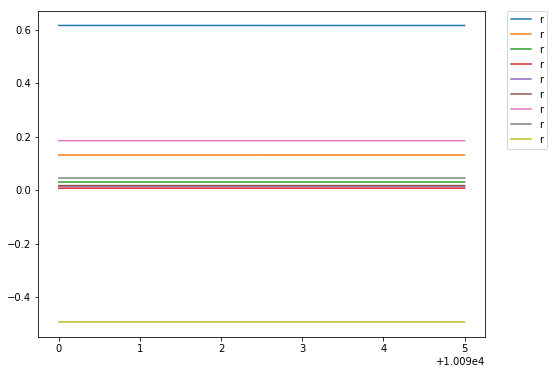

In [15]:
imin = 10090
imax = 10100
istep=5

ilist = np.arange(imin, imax, istep)

t = np.arange(0, 8*10**-6, 10**-10)

steady = list()

#print(steady)
for i in ilist:
    #print(i)
    I = i*0.1
    Om = sqrt((3 * l21**3 * g21 * I )/(2*pi*h*c))
    r0=(0,1,0,0,0,0,0,0,0)
    res = odeint(rhs, r0, t)
    steady.append(res[len(res)-1])


print(steady)
plt.figure(figsize=(8,6))

plt.legend()
plt.plot(ilist, steady, label="r")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


### Power of 455nm peak as a function of beam intensity

No handles with labels found to put in legend.


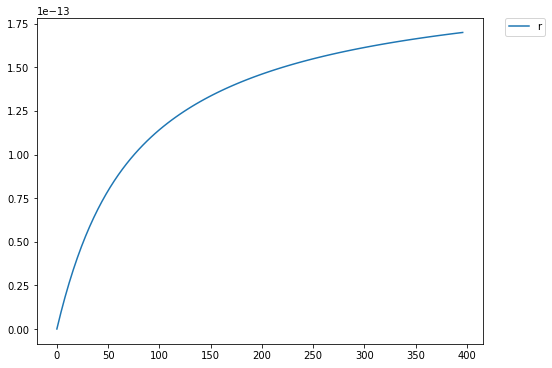

In [19]:
power455 = list()
for p in range(0,len(ilist)):
    power455.append(1*[row[1] for row in steady][p]*g21*h*c/l21)
    
plt.figure(figsize=(8,6))

plt.legend()
plt.plot(ilist,power455, label="r")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Calculating emission powers with respect to the 894nm transition

In [42]:
I = 183 * 0.001 * 1/(10**-2)**2
Om = sqrt((3 * l21**3 * g21 * I )/(2*pi*h*c))


p21 = 1*res[len(res)-1][1]*g21*h*c/l21
p23 = 1*res[len(res)-1][1]*g23*h*c/l23
p35 = 1*res[len(res)-1][2]*g35*h*c/l35
p41 = 1*res[len(res)-1][3]*g41*h*c/l41
p64 = 1*res[len(res)-1][5]*g64*h*c/l64
p51 = 1*res[len(res)-1][4]*g51*h*c/l51
p65 = 1*res[len(res)-1][5]*g65*h*c/l65
p75 = 1*res[len(res)-1][6]*g75*h*c/l75
p27 = 1*res[len(res)-1][1]*g27*h*c/l27
p34 = 1*res[len(res)-1][2]*g34*h*c/l34
p26 = 1*res[len(res)-1][1]*g26*h*c/l26

print("Transition \t 2->1\t 2->3\t 3->5\t 4->1\t 6->4\t 5->1\t 6->5\t 7->5\t 2->7\t 3->4\t 2->6")
print('Wavelenth\t','{0:.0f}'.format(l21*10**9), "\t", '{0:.0f}'.format(l23*10**9), "\t",'{0:.0f}'.format(l35*10**9), "\t",'{0:.0f}'.format(l41*10**9), "\t",'{0:.0f}'.format(l64*10**9),"\t",'{0:.0f}'.format(l51*10**9), "\t",'{0:.0f}'.format(l65*10**9), "\t",'{0:.0f}'.format(l75*10**9), "\t",'{0:.0f}'.format(l27*10**9), "\t",'{0:.0f}'.format(l34*10**9), "\t",'{0:.0f}'.format(l26*10**9))
norm = p41
print("Relative Power\t", '{0:.2f}'.format(p21/norm),"\t",'{0:.2f}'.format(p23/norm),"\t",'{0:.2f}'.format(p35/norm),"\t",'{0:.2f}'.format(p41/norm),"\t",'{0:.2f}'.format(p64/norm),"\t",'{0:.2f}'.format(p51/norm),"\t",'{0:.2f}'.format(p65/norm),"\t",'{0:.2f}'.format(p75/norm),"\t",'{0:.2f}'.format(p27/norm),"\t",'{0:.2f}'.format(p34/norm),"\t",'{0:.2f}'.format(p26/norm),"\t")

Transition 	 2->1	 2->3	 3->5	 4->1	 6->4	 5->1	 6->5	 7->5	 2->7	 3->4	 2->6
Wavelenth	 456 	 2932 	 1470 	 894 	 3011 	 852 	 3614 	 3491 	 1361 	 1359 	 1343
Relative Power	 2.33 	 0.80 	 1.03 	 1.00 	 0.02 	 2.53 	 0.00 	 0.18 	 0.47 	 0.61 	 0.06 	


0.39761092150170646